In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [2]:
pipeline_baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0).rename(columns = {"Method": "method"})
pipeline_baselines[pipeline_baselines["csv_file"] == "AutoMPG.csv"]

,csv_file,method,split,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),CE (4 KNN)
40,AutoMPG.csv,Domain A Pipeline Baseline,random,0.853003,0.891389,0.867925,0.400147,0.362866,0.837942
41,AutoMPG.csv,Domain B Pipeline Baseline,random,0.717576,0.705817,0.758699,0.540866,0.597198,0.589965
42,AutoMPG.csv,Domain A Pipeline Baseline,even,0.856505,0.876371,0.842714,0.436671,0.387142,0.838667
43,AutoMPG.csv,Domain B Pipeline Baseline,even,0.715317,0.824578,0.772369,0.525322,0.461160,0.664236
44,AutoMPG.csv,Domain A Pipeline Baseline,turn,0.855654,0.894404,0.850249,0.426083,0.357794,0.817890
45,AutoMPG.csv,Domain B Pipeline Baseline,turn,0.860148,0.838246,0.850249,0.426083,0.442830,0.817890
46,AutoMPG.csv,Domain A Pipeline Baseline,skewed,0.603672,0.526916,0.638252,0.662237,0.757319,0.569903
47,AutoMPG.csv,Domain B Pipeline Baseline,skewed,0.853153,0.912196,0.861153,0.410278,0.326263,0.835345
48,AutoMPG.csv,Domain A Pipeline Baseline,distort,0.855654,0.894404,0.850249,0.426083,0.357794,0.817890
49,AutoMPG.csv,Domain B Pipeline Baseline,distort,0.841350,0.861267,0.844655,0.433968,0.410109,0.795782


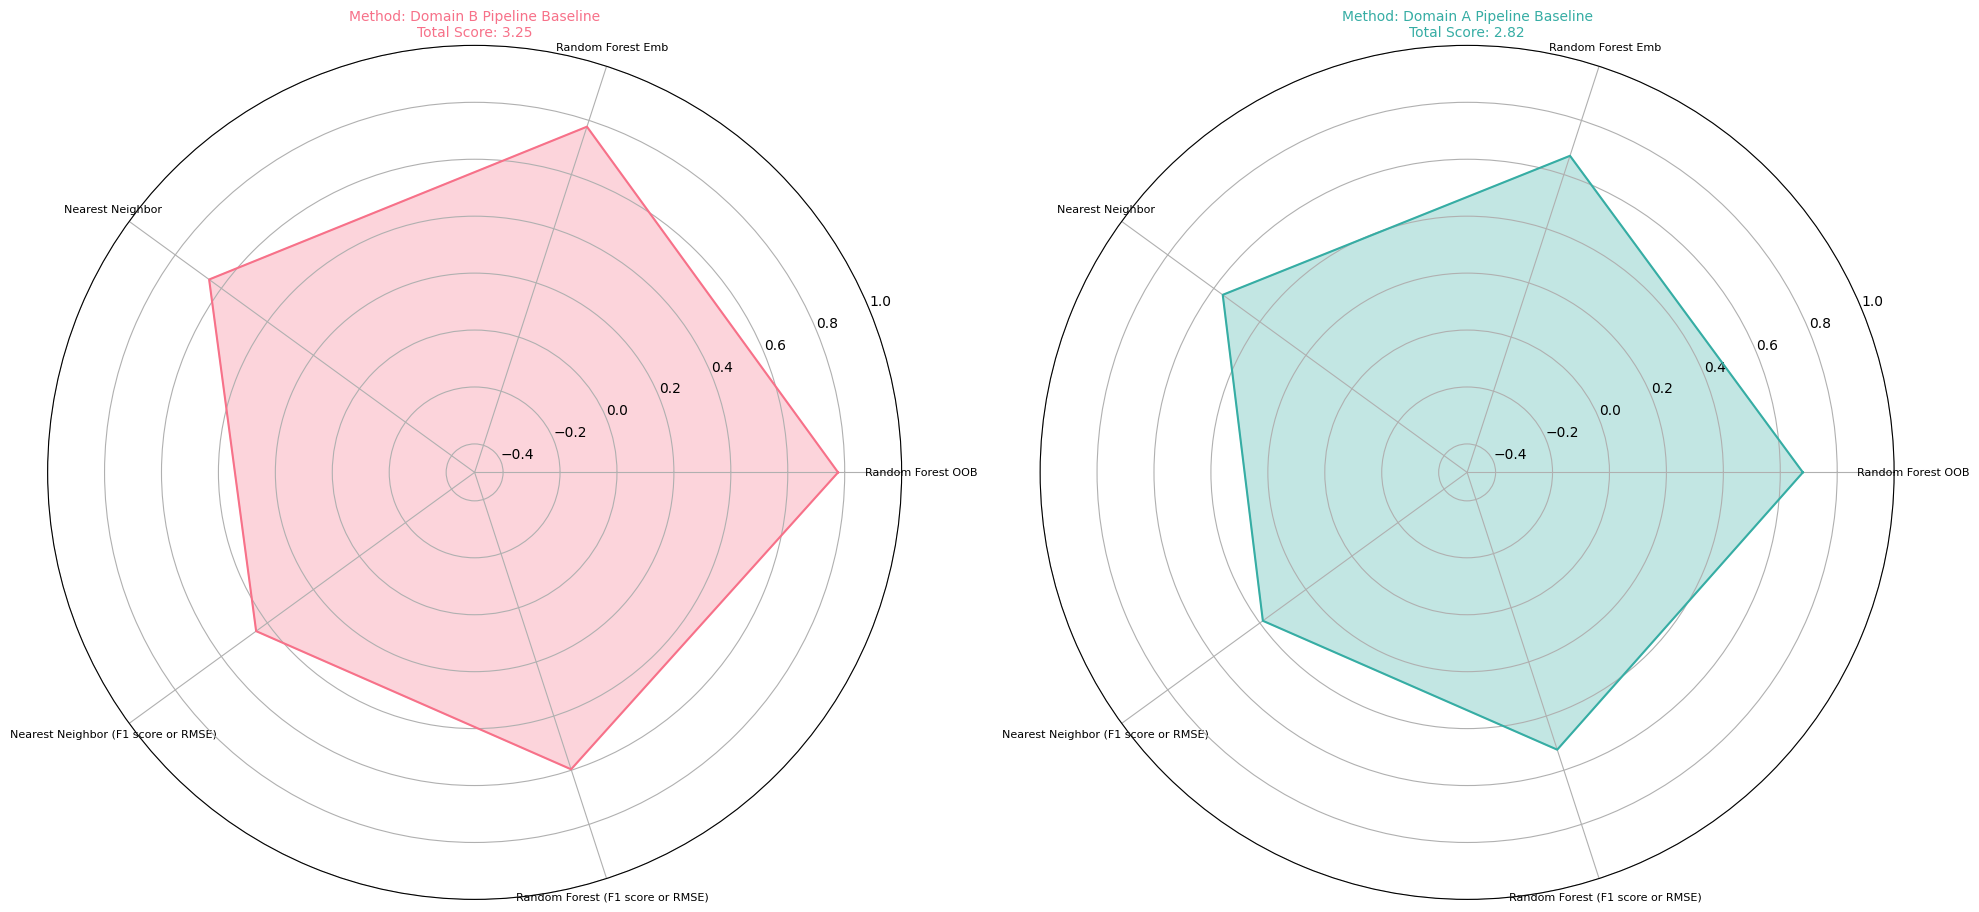

In [3]:
plot_radial(pipeline_baselines, ['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

In [4]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines_in_sample = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataTrainTest.csv", index_col=0).rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
148,EnergyEfficiency,turn,130,0.862570,0.862565
459,IstanbulStock,distort,101,0.509019,0.457661
173,CommunityCrime,skewed,122,0.463548,0.582872
351,FacebookMetrics,turn,12,0.771436,0.771436
399,FacebookMetrics,distort,92,0.462626,0.456548


In [5]:
# Group by csv_file and select the row with the 3rd smallest knn value
third_smallest_knn = baselines.groupby(by = ["csv_file", "split"]).apply(lambda x: x.nsmallest(3, 'KNN').iloc[-1]).reset_index(drop=True)

# Ensure the resulting DataFrame has the same format as baselines_grouped
third_smallest_knn_grouped = third_smallest_knn.groupby(by=["csv_file", "split"]).agg({
    "A_Classification_Score": "max",
    "B_Classification_Score": "max"
}).reset_index()

third_smallest_knn_grouped

,csv_file,split,A_Classification_Score,B_Classification_Score
0,AirfoilSelfNoise,distort,0.618199,0.569388
1,AirfoilSelfNoise,even,0.276153,0.236131
2,AirfoilSelfNoise,random,0.102140,0.120893
3,AirfoilSelfNoise,skewed,0.130755,0.306649
4,AirfoilSelfNoise,turn,0.618199,0.618291
...,...,...,...,...
65,SML2010,distort,0.805852,0.794499
66,SML2010,even,0.894993,0.724169
67,SML2010,random,0.673677,0.159716
68,SML2010,skewed,0.687260,0.826502


In [6]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
try:
    baselines_grouped.drop(columns = ["Unnamed: 0"], inplace= True)
except:
    print("Didn't need to run")

baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

Didn't need to run


,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.731098,0.583344
46,Hydrodynamics,even,-0.132785,0.971827
47,Hydrodynamics,random,0.904653,-0.135059
48,Hydrodynamics,skewed,-0.134976,0.916070
49,Hydrodynamics,turn,0.731098,0.730979


<Axes: xlabel='csv_file'>

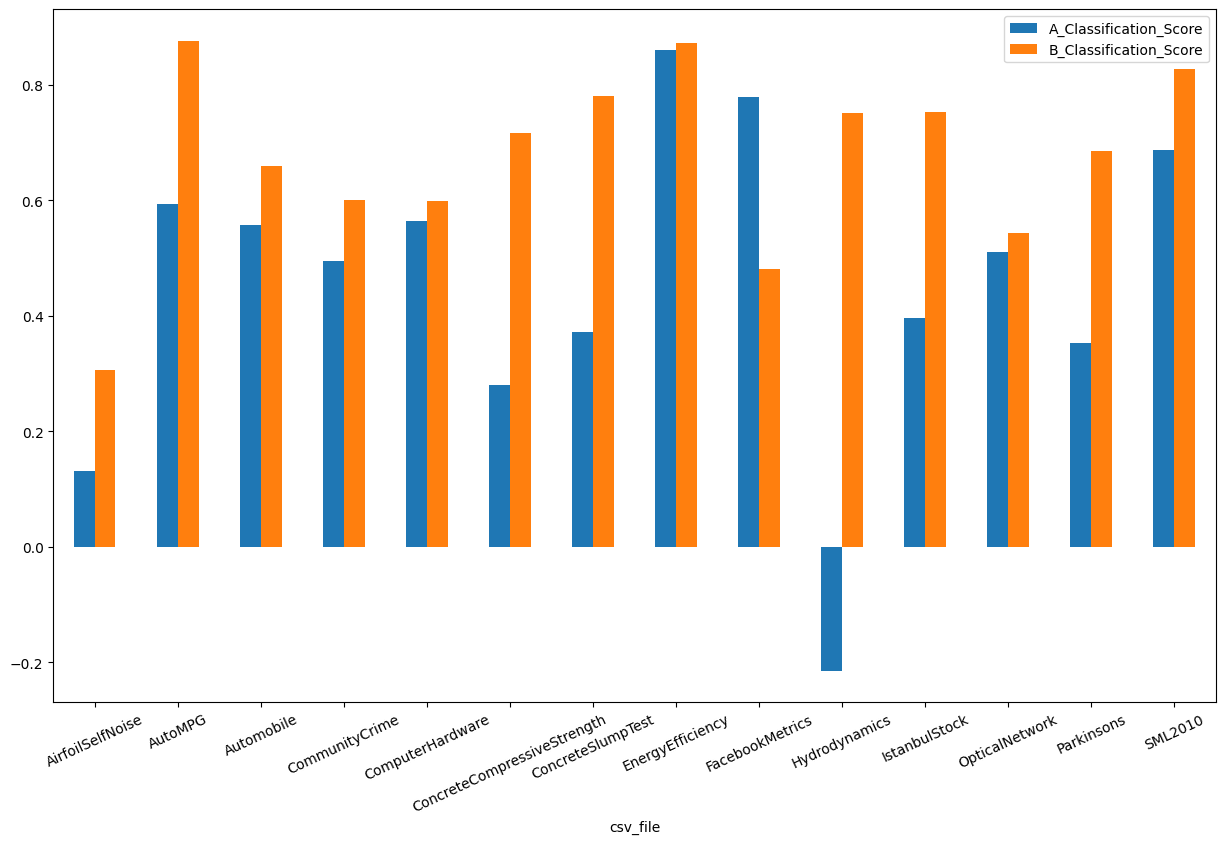

In [7]:
third_smallest_knn_grouped[third_smallest_knn_grouped["split"] == "skewed"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)

# Model Comparison

In [8]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1198


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
724,SSMA,Automobile,turn,0.3,"{'knn': 22, 'Uincluded': True, 'Dincluded': True}","{'42': 0.7683162996913951, '1738': 0.768316299...","{'42': 0.01062776887548308, '1738': 0.01065133...","{'42': 0.873053734658514, '1738': 0.3726024696...","{'42': 0.6114416963170887, '1738': -0.46702180...","{'42': 0.5215779098328748, '1738': 0.250374132...","{'42': 0.6968197624376054, '1738': 0.896779510...","{'42': 0.6279758527523961, '1738': 1.254531815...","{'42': {'RF-OOB': 0.8618041301645967, 'KNN': -...",{}
1089,RF-SPUD,ConcreteCompressiveStrength,turn,0.3,"{'knn': 2, 'OD_method': 'mean', 'agg_method': ...","{'42': -0.235959231254387, '1738': -0.27462170...","{'42': 0.0033066264492412106, '1738': 0.006747...","{'42': -0.0712113109505983, '1738': -0.0143996...","{'42': -0.0950138023619449, '1738': -0.2030099...","{'42': -0.020097342649211702, '1738': -0.04828...","{'42': 0.9704938282927723, '1738': 1.012090554...","{'42': 1.0054992858499283, '1738': 1.084209757...","{'42': {'RF-OOB': -0.016792894057117813, 'KNN'...",{}
217,NAMA,EnergyEfficiency,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.2884488628479809, '1738': -0.3275092...","{'42': 0.1589143541124132, '1738': 0.211483425...","{'42': 0.8805842433571001, '1738': 0.887587569...","{'42': 0.9043641336993187, '1738': 0.889388582...","{'42': 0.8768151425158252, '1738': 0.873930278...","{'42': 0.35512961364299445, '1738': 0.35889947...","{'42': 0.31290941041024106, '1738': 0.33617654...","{'42': {'RF-OOB': 0.883350040728616, 'KNN': 0....","{'OD_method': 0.04053483689608439, 'agg_method..."
117,MAPA,Hydrodynamics,skewed,0.3,"{'knn': 37, 'r': 50}",{'42': 0.04231814376793319},{'42': 0.26152187499999996},{'42': 0.14461102265003067},{'42': 0.2886559258728306},{'42': 0.17833978940932915},{'42': 0.9908587346045796},{'42': 0.9219459754631794},"{'42': {'RF-OOB': 0.21103616685148263, 'KNN': ...",{}
103,MASH,Hydrodynamics,skewed,0.3,"{'knn': 65, 'page_rank': 'None', 'DTM': 'log',...",{'42': 0.030321021223731703},{'42': 0.2827837746668916},{'42': 0.13713833635076034},{'42': -0.4461927677878841},{'42': -0.2975901596296664},{'42': 0.9158955755139022},{'42': 0.9669194181501651},"{'42': {'RF-OOB': 0.20258049432440373, 'KNN': ...","{'connection_limit': 0.0, 'threshold': 0.0, 'e..."


In [9]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(third_smallest_knn_grouped, how = "left")

In [10]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
845,SSMA,IstanbulStock,turn,0.3,0.683712,0.008981,0.680923,-0.014276,0.317929,0.849219,1.026555,"{'42': {'RF-OOB': 0.9448493554281991, 'KNN': 0...",0.674731,0.704422,0.704422
211,RF-SPUD,EnergyEfficiency,distort,0.3,0.306841,0.107051,0.894403,0.871043,0.859293,0.378435,0.361572,"{'42': {'RF-OOB': 0.47664524441277534, 'KNN': ...",0.199791,0.887615,0.885028
1098,MAGAN,ConcreteCompressiveStrength,distort,0.3,-0.629855,0.000029,0.541825,0.495848,0.255198,0.847137,0.695991,"{'42': {'RF-OOB': 0.5227501656420239, 'KNN': 0...",-0.629884,0.610397,0.590292


In [11]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, metric = "Combined_Metric", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,IstanbulStock,0.674731,0.292751,0.844776,0.441662,0.661281,0.811195,NaN,0.195857,-0.124704,0.834900,0.730128,NaN,-0.316266,0.366207,0.766318,0.714484,0.771851
1,FacebookMetrics,0.592234,-0.007211,0.759274,0.262851,0.665146,0.661085,0.592401,0.320081,-0.121600,0.744296,0.660645,0.690289,-0.114347,0.503568,0.543361,0.778232,0.691495
2,Hydrodynamics,0.664402,0.532023,0.899806,0.799632,0.671012,0.706608,0.878167,-0.054671,-0.077427,0.895496,0.796840,0.720924,-0.211597,0.759538,0.932535,0.585006,0.790342
3,AirfoilSelfNoise,0.488030,-0.113552,0.962474,0.531724,0.682093,0.859316,0.741527,-0.135461,-0.169613,0.924405,0.848466,NaN,-0.270939,-0.182528,-0.057775,0.618199,0.618291
4,CommunityCrime,0.497916,-0.024250,0.793918,0.535569,0.710046,0.712440,0.583943,-0.142984,-0.192051,0.786104,0.740419,0.642806,-0.290245,-0.139376,0.252467,0.592101,0.599702
5,Automobile,0.757670,0.256283,0.882649,0.715318,0.734306,0.821432,NaN,0.343892,0.098240,0.881048,0.804208,NaN,-0.139808,0.795496,0.769123,0.624074,0.717398
6,OpticalNetwork,0.473332,-0.147061,0.908100,0.518772,0.747207,0.676237,0.924531,-0.180715,-0.182083,0.910902,0.854887,0.774292,-0.350329,0.451797,0.022364,0.615307,0.798834
7,ConcreteSlumpTest,0.513335,0.395941,0.890893,0.623485,0.780732,0.651620,0.570243,0.123935,0.102971,0.816872,0.875523,0.318204,-0.171756,0.852770,0.793678,0.745238,0.779765
8,ComputerHardware,0.962834,0.096644,0.964519,0.686117,0.797657,0.864906,0.581483,0.045628,0.069540,0.949490,0.845673,0.809029,-0.189637,0.927786,0.641705,0.656128,0.626540
9,AutoMPG,0.824608,0.263139,0.937706,0.688194,0.840361,0.884094,0.838660,0.045526,-0.037382,0.926311,0.903269,NaN,-0.251526,0.880391,0.804642,0.832214,0.876258


<Axes: >

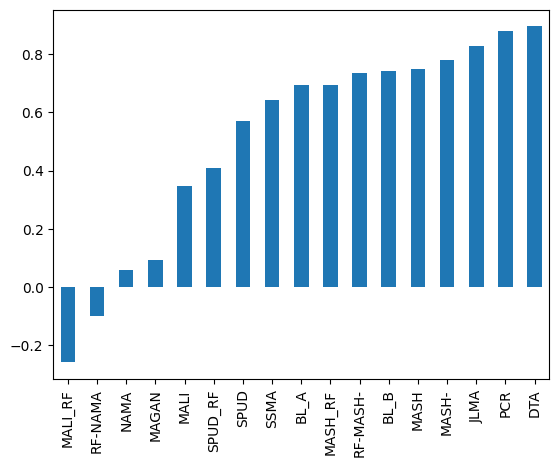

In [12]:
# Visualization
results_df.drop(columns=["csv_file"]).mean(axis = 0).sort_values().plot(kind="bar")

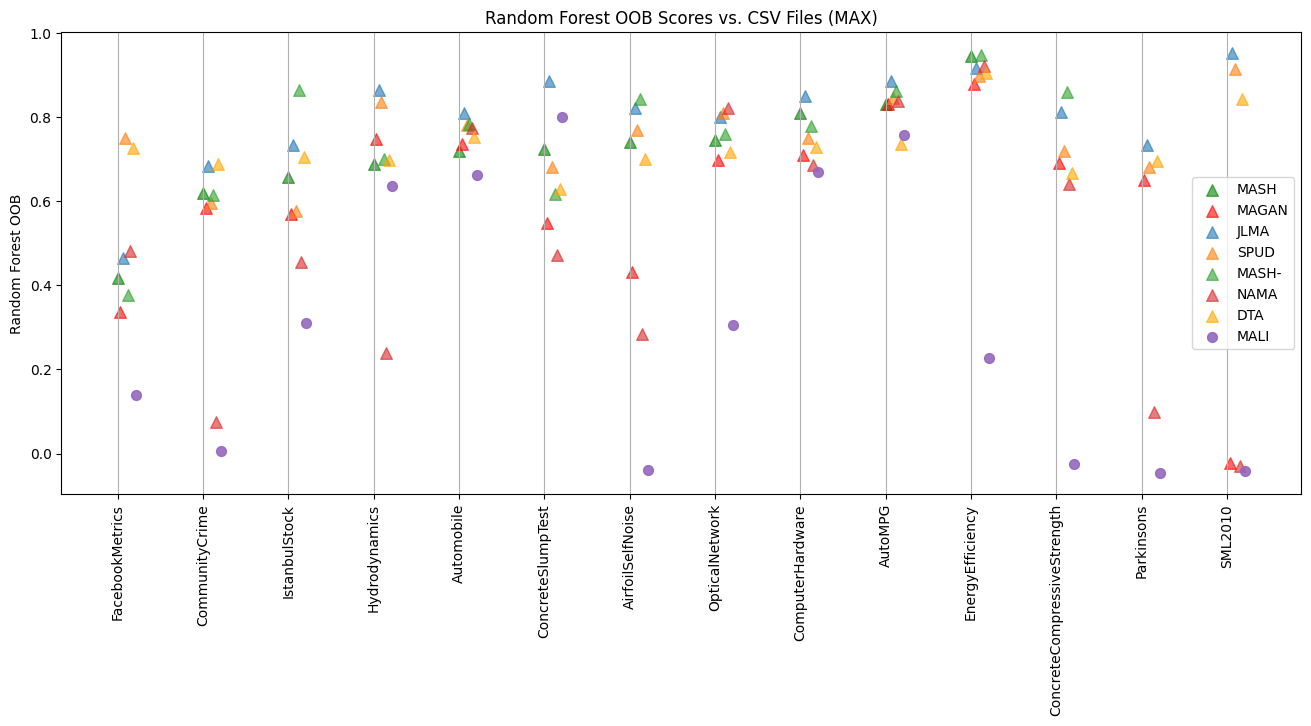

In [13]:
plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB",
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [14]:
proc_reg_df["method"].nunique()

15

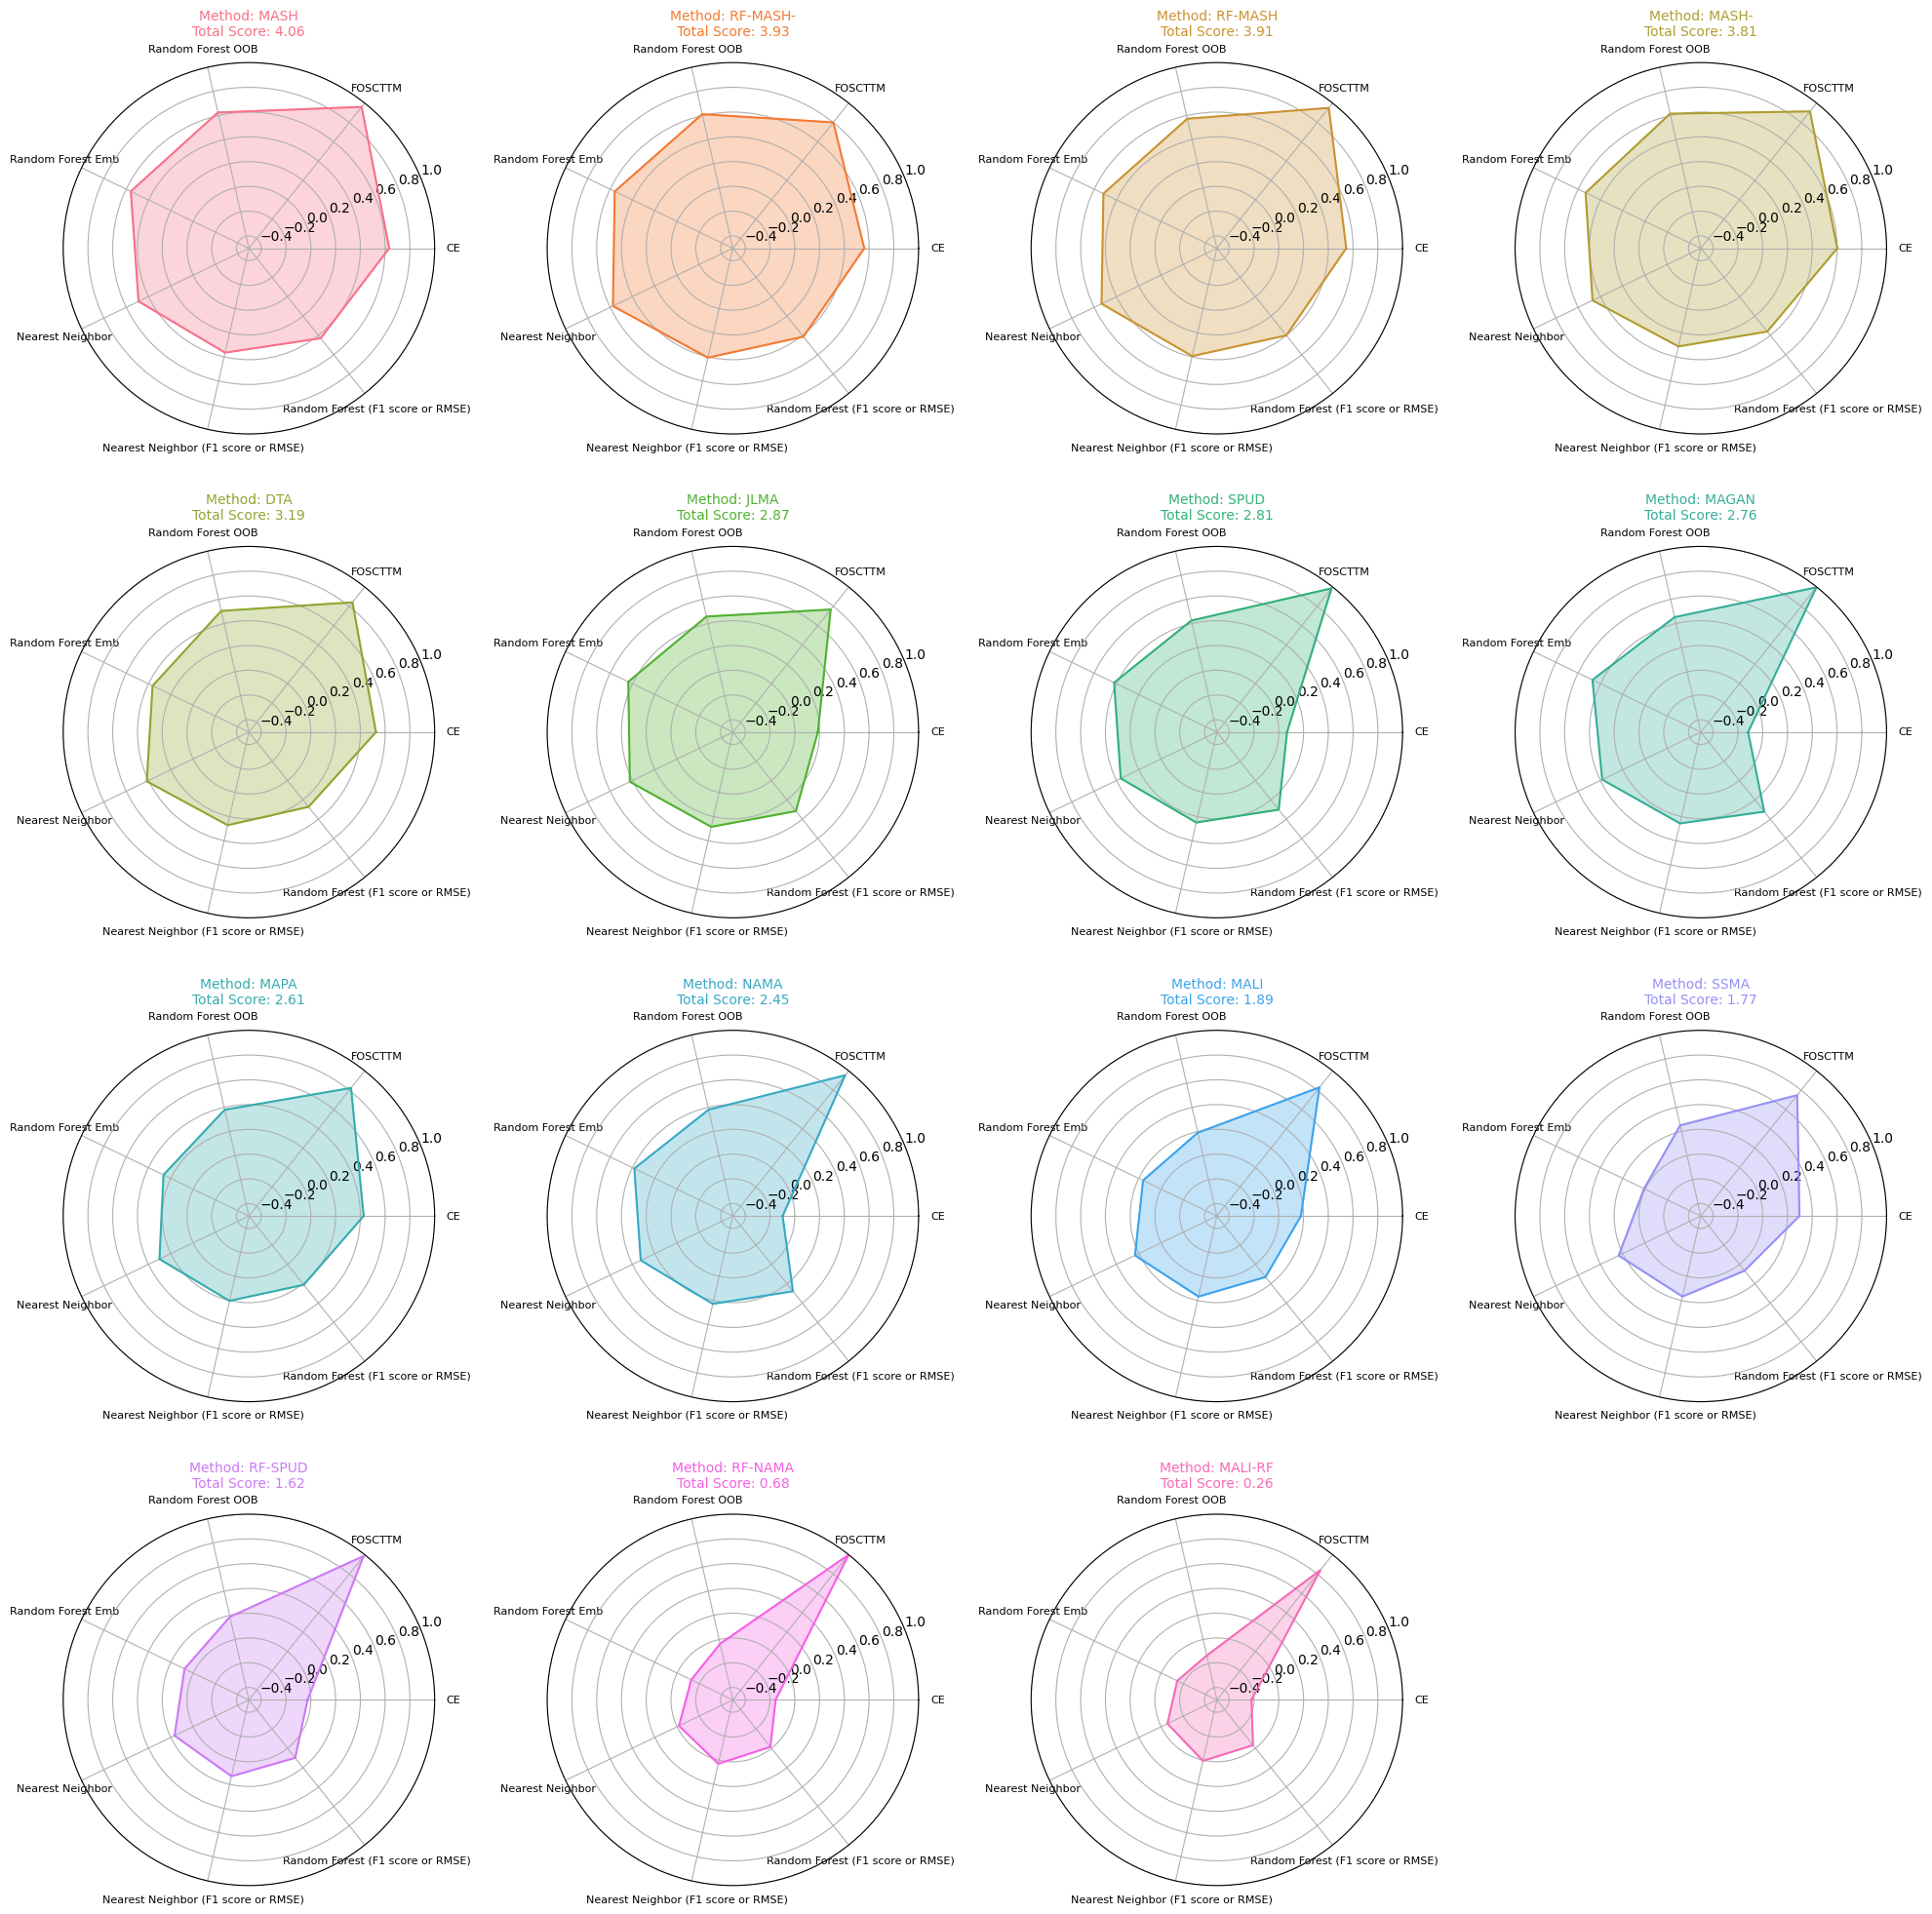

In [15]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [16]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
428,MALI-RF,SML2010,even,0.3,-0.225667,7.932570e-02,-0.061131,-0.040836,-0.007724,0.999480,1.015768,"{'42': {'RF-OOB': -0.051352142310905124, 'KNN'...",-0.304993,0.894993,0.724169
877,NAMA,Parkinsons,skewed,0.3,-0.178118,1.448619e-07,0.031947,0.081864,0.009213,0.981042,0.944389,"{'42': {'RF-OOB': 0.045423429992243025, 'KNN':...",-0.178118,0.353516,0.685514


In [17]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
1008,0.036084,0.890973,-0.017492,0.223463,0.915399
583,0.721618,0.482953,0.751861,0.702572,0.455966


In [18]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
719,JLMA,Automobile,even,0.3,0.672365,0.169890,0.678679,0.674793,0.558506,0.476857,0.409266,0.502474,0.624074,0.717398,0.651014,0.423965,0.728164,0.739897,0.374178
21,RF-NAMA,ComputerHardware,skewed,0.3,-0.007576,0.000137,-0.240651,-0.022256,0.058974,1.360880,1.418400,-0.007713,0.563188,0.598966,-0.047282,1.435658,0.015123,-0.088119,1.392227


In [19]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

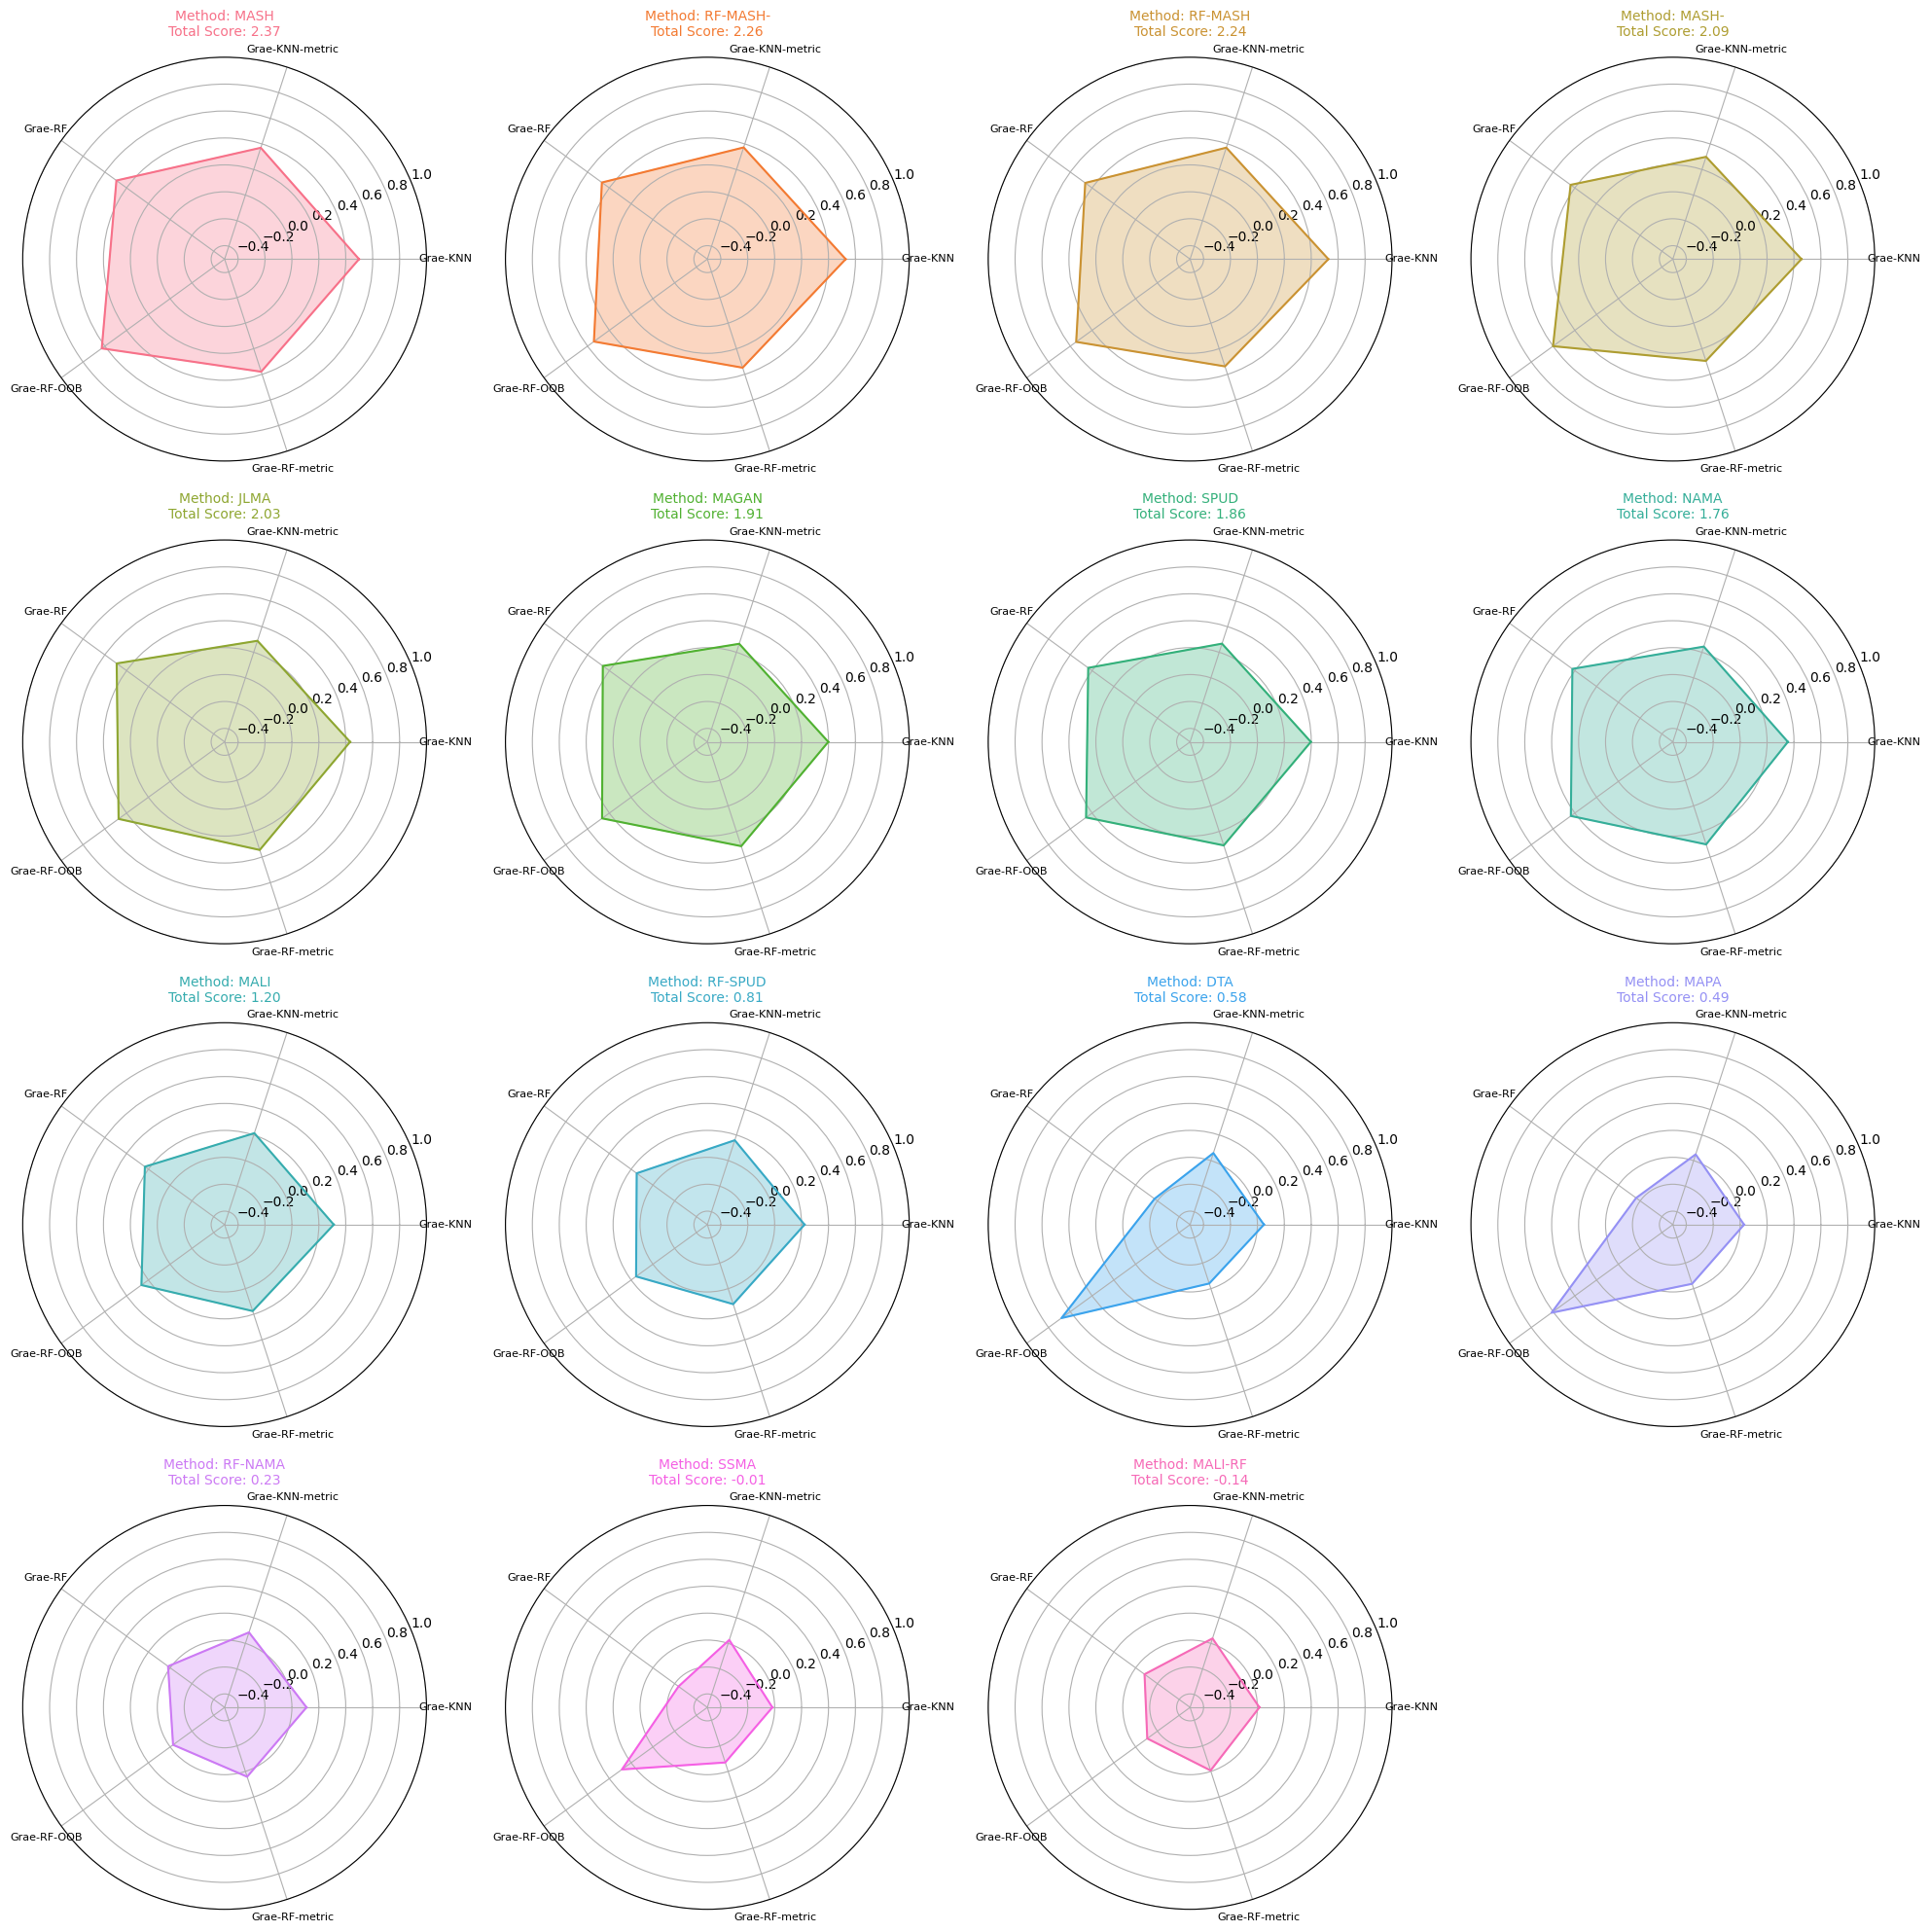

In [20]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [21]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
1123,MASH,AirfoilSelfNoise,distort,0.3,0.691282,0.009189,0.740675,0.712776,0.256419,0.848645,0.527050,0.682093,0.618199,0.569388,0.359175,0.821330,0.441441,0.744639,0.766801
10,RF-NAMA,ComputerHardware,random,0.3,0.007326,0.000655,-0.079424,-0.337161,-0.127331,1.091315,1.157755,0.006671,0.656128,0.433617,0.021169,1.385961,-0.016573,-0.104838,1.411268


In [ ]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.118300,0.003965,0.452572,0.471638,0.383893,0.743620,0.677896,-0.122265,0.398445,0.733898,0.460010,0.466873,0.685366
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.220123,0.158884,-0.132888,-0.145124,-0.057266,0.994242,1.031648,-0.379007,0.014820,0.961203,-0.081615,-0.106606,1.007045
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
MASH,0.633244,0.039266,0.625294,0.558990,0.489222,0.635065,0.570344,0.593978,0.498696,0.630262,0.493514,0.628136,0.620414
MASH-,0.602140,0.085892,0.615182,0.533215,0.470874,0.686417,0.639438,0.516247,0.455589,0.700971,0.438788,0.600415,0.704844
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235


In [23]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'MASH', 'MASH-',
        'NAMA', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [24]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [25]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.054127,-0.262260,-0.076117,-0.276747,0.007470
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.147707,-1.106327,0.024349,-1.100848,-0.024603
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
MASH,0.126598,-0.071271,-0.004292,-0.006928,0.050070
MASH-,0.159593,-0.167756,0.032086,-0.086002,0.065407
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620


<Axes: xlabel='method'>

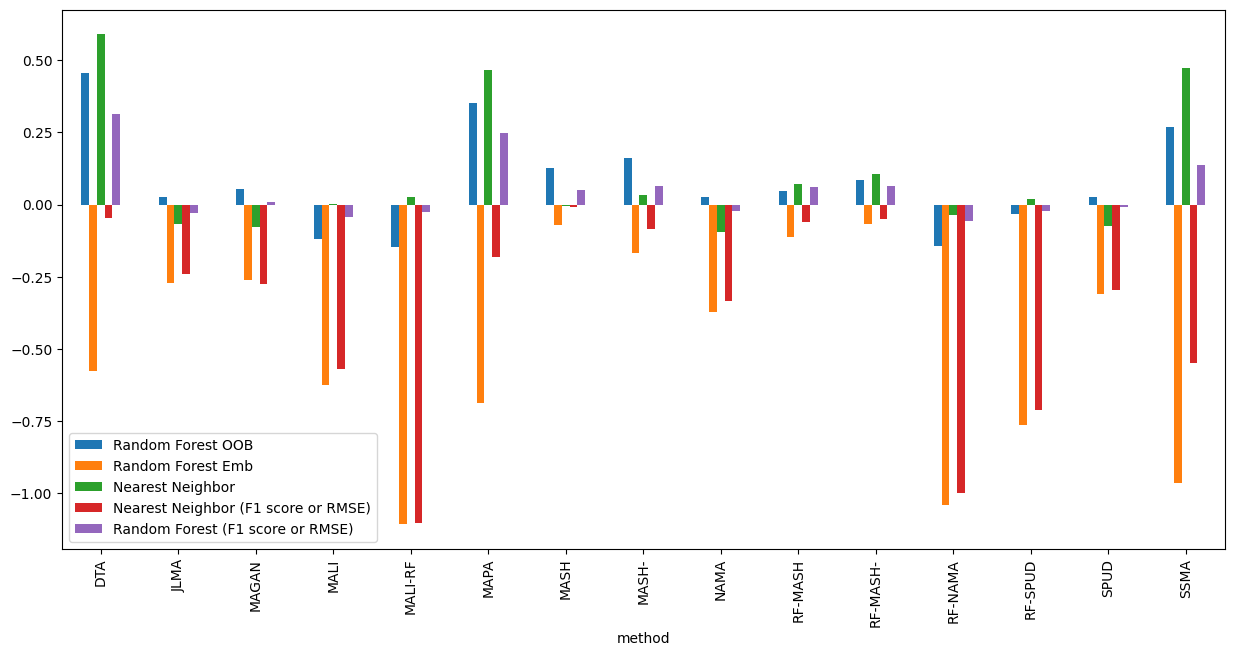

In [ ]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [27]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
224,DTA,EnergyEfficiency,skewed,0.3,"{'knn': 130, 'distances': 'Not_DPT'}",0.735974,0.25656,{'42': 0.9044975869009754},{'42': 0.9087981368248828},{'42': 0.8445724849955799},{'42': 0.4104236629949076},{'42': 0.314391137967101},"{'42': {'RF-OOB': 0.91004836460814, 'KNN': -0....",{},0.479414
1134,SPUD,AirfoilSelfNoise,distort,0.3,"{'knn': 2, 'OD_method': 'mean', 'agg_method': ...",-0.178012,0.09373,"{'42': -0.06484327935341927, '1738': -0.078455...","{'42': -0.03529954245526867, '1738': -0.037798...","{'42': -0.0007639533296790457, '1738': -0.0014...","{'42': 1.026393747597754, '1738': 1.0052938888...","{'42': 1.0439535653176997, '1738': 1.023385366...","{'42': {'RF-OOB': -0.1007221050545326, 'KNN': ...","{'knn': 0.3837553803583544, 'OD_method': 0.013...",-0.271742


### Spud Parameters on STD

In [28]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

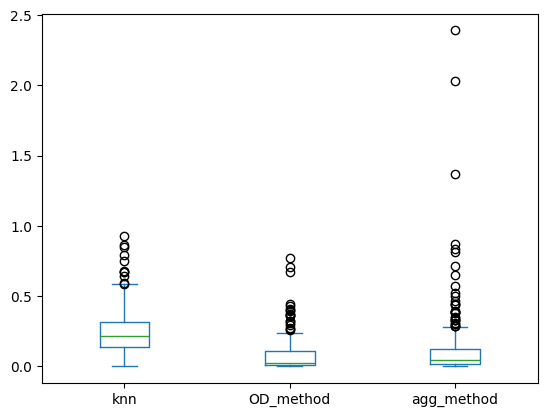

In [29]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [ ]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.091198,0.001743,0.056166,0.0
1,0.047936,0.000929,0.009001,0.0
2,0.069745,0.016468,0.034861,0.0
3,0.092476,0.003621,0.057043,0.0
4,0.051415,0.001241,0.002022,0.0
5,0.141600,0.008092,0.227942,0.0
6,0.191730,0.005466,0.008325,0.0
7,0.096132,0.125204,0.018123,0.0
8,0.165853,0.004503,0.059039,0.0
9,0.238521,0.004086,0.118961,0.0


<Axes: >

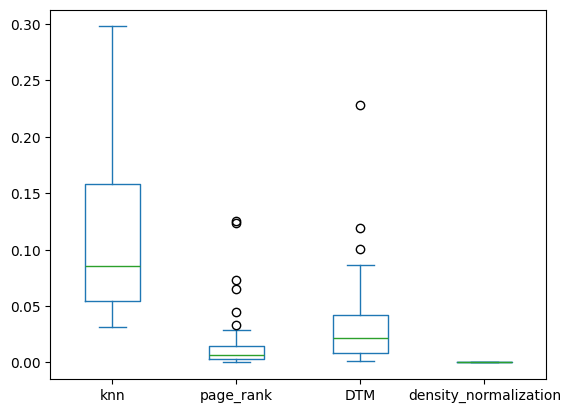

In [31]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [32]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.034223,0.022946,1.110223e-16
1,0.000000,0.000000,0.000000e+00
2,0.006056,0.032130,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.000000,0.000000,0.000000e+00
5,0.000000,0.000000,1.110223e-16
6,0.000000,0.000000,0.000000e+00
7,0.027127,0.181203,0.000000e+00
8,0.000000,0.071349,0.000000e+00
9,0.009295,0.021120,1.253144e-03


<Axes: >

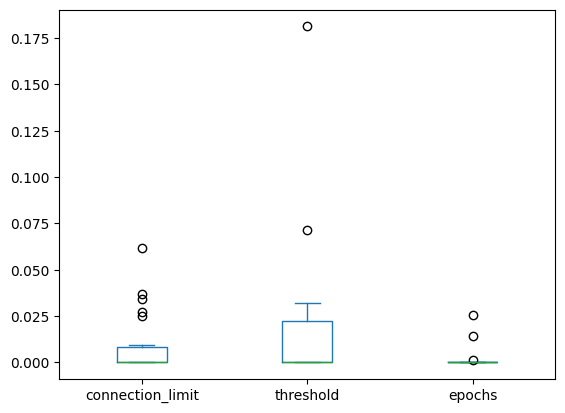

In [33]:
mash_param_df.plot(kind = "box") 